> Import dataset

In [ ]:
# Import libraries

import os
import shutil
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

plt.rc('font', size=16) 

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.4


In [ ]:
# Set seed for reproducibility

seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
# Load the dataset

x_data = np.load('../input/training-dataset-homework2zip/x_train.npy')
y_data = np.load('../input/training-dataset-homework2zip/y_train.npy')
x_data.shape, y_data.shape

((2429, 36, 6), (2429,))

> Inspect data

In [ ]:
labels = ['Wish',         # 0
          'Another',      # 1
          'Comfortably',  # 2
          'Money',        # 3
          'Breathe',      # 4
          'Time',         # 5
          'Brain',        # 6
          'Echoes',       # 7
          'Wearing',      # 8
          'Sorrow',       # 9
          'Hey',          # 10
          'Shine']        # 11

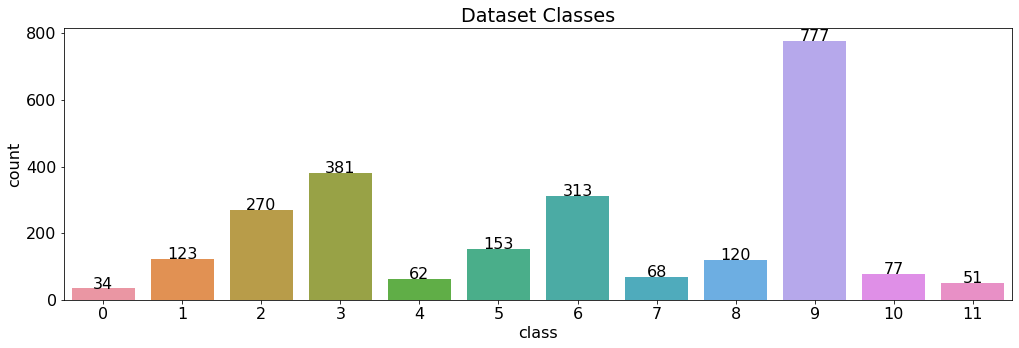

In [ ]:
# Inspect classes

df = pd.DataFrame(y_data, columns = ['class'])

plt.figure(figsize=(17,5))
graph = sns.countplot(x = 'class', data = df)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['class'].value_counts()[i],ha="center")
    i += 1

plt.title('Dataset Classes')
plt.show()


> Preprocessing

In [ ]:
# Reshape data

#reshape the data in a format where each feature is a column
num_instances, num_time_steps, num_features = x_data.shape
x_data_flat = np.reshape(x_data, newshape=(-1, num_features))

#create the dataframe
columns = ['col_0','col_1','col_2','col_3','col_4','col_5']
df_data = pd.DataFrame(x_data_flat, columns = columns)
df_data

,col_0,col_1,col_2,col_3,col_4,col_5
0,17.59700,8.17130,-1.78420,-19.70600,-9.71350,-61.8870
1,0.22974,-5.89560,16.83700,5.03900,2.43320,58.9140
2,-29.65400,-21.29600,29.10300,-0.47503,75.39100,10.6650
3,-59.21000,-29.56500,17.97100,-45.60600,19.41200,-43.0140
4,-72.06400,-25.85500,0.46536,-59.15100,-29.10500,-11.9130
...,...,...,...,...,...,...
87439,3.51190,-1.03240,-1.69900,4.15790,2.75430,5.9823
87440,0.70853,-0.94622,-1.91760,2.09480,-4.76750,7.4118
87441,0.20638,1.02870,-0.92512,-0.71633,1.73330,4.7638
87442,4.14290,1.09390,-0.18921,1.14100,0.93441,4.1742


In [ ]:
# Reshape labels

y_data_flat = []
for i in range(0, y_data.shape[0]):
    for j in range (i*36,(i+1)*36):
        y_data_flat = np.append(y_data_flat, y_data[i])
y_data_flat = y_data_flat.astype(int)

df_data["class"] = y_data_flat
df_data

,col_0,col_1,col_2,col_3,col_4,col_5,class
0,17.59700,8.17130,-1.78420,-19.70600,-9.71350,-61.8870,0
1,0.22974,-5.89560,16.83700,5.03900,2.43320,58.9140,0
2,-29.65400,-21.29600,29.10300,-0.47503,75.39100,10.6650,0
3,-59.21000,-29.56500,17.97100,-45.60600,19.41200,-43.0140,0
4,-72.06400,-25.85500,0.46536,-59.15100,-29.10500,-11.9130,0
...,...,...,...,...,...,...,...
87439,3.51190,-1.03240,-1.69900,4.15790,2.75430,5.9823,11
87440,0.70853,-0.94622,-1.91760,2.09480,-4.76750,7.4118,11
87441,0.20638,1.02870,-0.92512,-0.71633,1.73330,4.7638,11
87442,4.14290,1.09390,-0.18921,1.14100,0.93441,4.1742,11


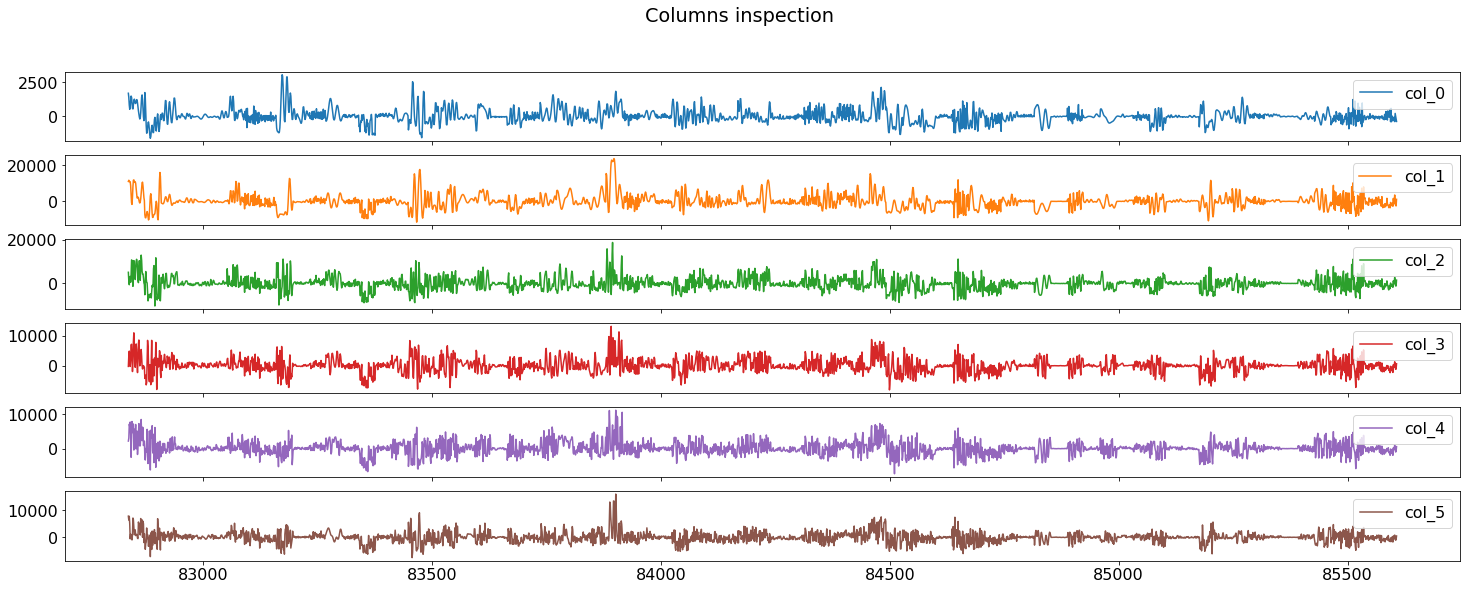

In [ ]:
# Show columns' trends

axis = (df_data[df_data['class'] == 10][columns]).plot(subplots=True, figsize=(25, 9), title="Columns inspection")
for ax in axis:
    ax.legend(loc='upper right')

In [ ]:
# Show sequence's trend

def inspect_seq(x_seq, idx):
    x_values = np.reshape(x_seq[idx], newshape=(-1, x_seq.shape[2])) #reshape and select the idx-th element 
    x_values = pd.DataFrame(x_values, columns = columns) #convert into dataframe

    axis = x_values.plot(subplots=True, figsize=(17, 9), title="Columns inspection") #plot each column
    for ax in axis:
        ax.legend(loc='upper right')

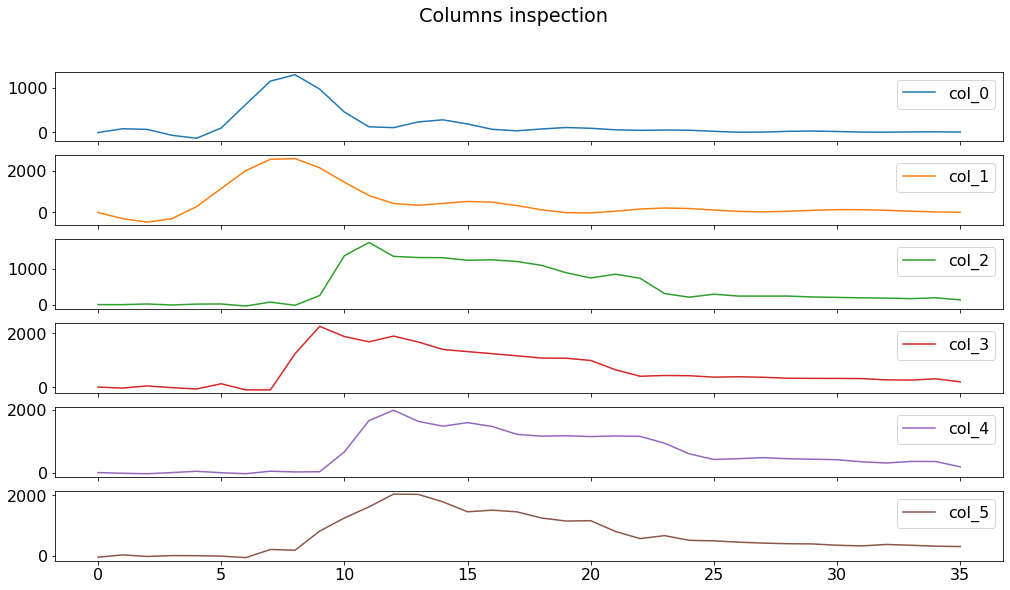

In [ ]:
# Inspect n-th sequence

n = 2400
inspect_seq(x_data, n)

In [ ]:
# Split into train and test

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=seed, shuffle=True, stratify=y_data)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1943, 36, 6), (486, 36, 6), (1943,), (486,))

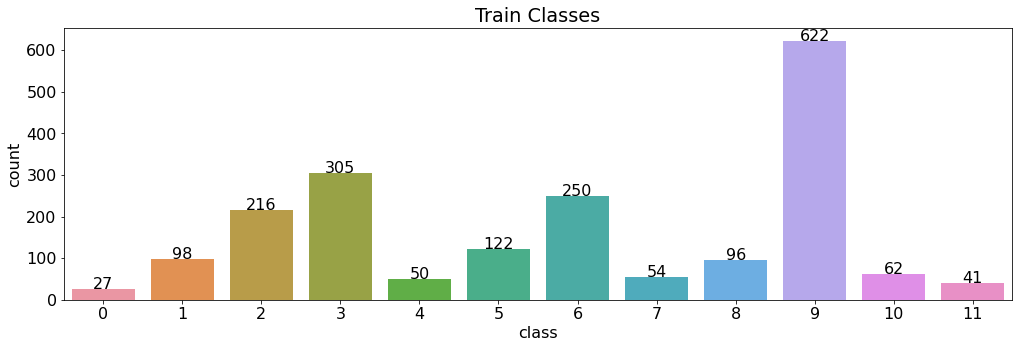

In [ ]:
# Inspect train split

df = pd.DataFrame(y_train, columns = ['class'])

plt.figure(figsize=(17,5))
graph = sns.countplot(x = 'class', data = df)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['class'].value_counts()[i],ha="center")
    i += 1

plt.title('Train Classes')
plt.show()

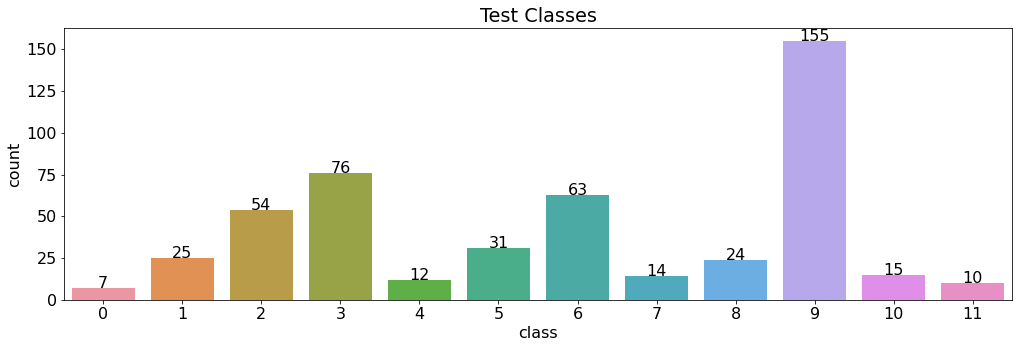

In [ ]:
# Inspect test split

df = pd.DataFrame(y_test, columns = ['class'])

plt.figure(figsize=(17,5))
graph = sns.countplot(x = 'class', data = df)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['class'].value_counts()[i],ha="center")
    i += 1

plt.title('Test Classes')
plt.show()

In [ ]:
# Convert labels in one-hot-encoding

print(y_train[0])
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)
print(y_train[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


> Build and train the model

In [ ]:
# Define parameter of the model

input_shape = x_train.shape[1:]
classes = y_train.shape[-1]
batch_size = 128
epochs = 200

In [ ]:
# Define the model

def build_BiLSTM_classifier(input_shape, classes):
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    bilstm = tfkl.Bidirectional(tfkl.LSTM(512, return_sequences=True))(input_layer)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(512))(bilstm)
    dropout = tfkl.Dropout(.5, seed=seed)(bilstm)

    # Classifier
    classifier = tfkl.Dense(256, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    return model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 36, 6)]           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 36, 1024)          2125824   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1024)              6295552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 12)                3084      
Total params: 8,686,860
Trainable params: 8,686,860
Non-trainable params: 0
___________________________________________________

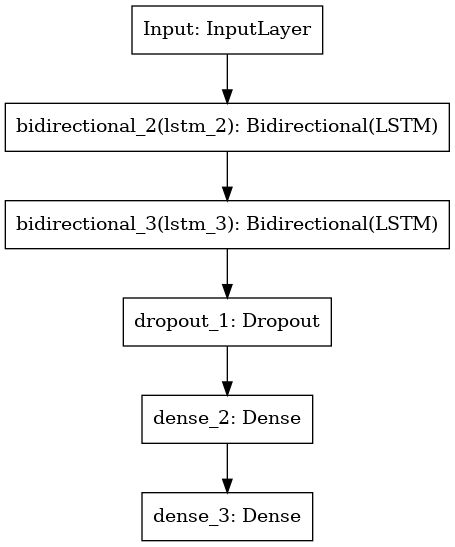

In [ ]:
# Build the model

model = build_BiLSTM_classifier(input_shape, classes)
model.summary()
tfk.utils.plot_model(model)

In [ ]:
# Train the model

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_test, y_test),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=7, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
16/16 [==============================] - 10s 136ms/step - loss: 1.7066 - accuracy: 0.4200 - val_loss: 1.2631 - val_accuracy: 0.5370
Epoch 2/200
16/16 [==============================] - 1s 60ms/step - loss: 1.1451 - accuracy: 0.6001 - val_loss: 1.1963 - val_accuracy: 0.5885
Epoch 3/200
16/16 [==============================] - 1s 59ms/step - loss: 0.9101 - accuracy: 0.6763 - val_loss: 1.1007 - val_accuracy: 0.6235
Epoch 4/200
16/16 [==============================] - 1s 59ms/step - loss: 0.7734 - accuracy: 0.7257 - val_loss: 1.1233 - val_accuracy: 0.6173
Epoch 5/200
16/16 [==============================] - 1s 64ms/step - loss: 0.7163 - accuracy: 0.7540 - val_loss: 1.1450 - val_accuracy: 0.6317
Epoch 6/200
16/16 [==============================] - 1s 60ms/step - loss: 0.5428 - accuracy: 0.8121 - val_loss: 1.1557 - val_accuracy: 0.6605
Epoch 7/200
16/16 [==============================] - 1s 63ms/step - loss: 0.4741 - accuracy: 0.8415 - val_loss: 1.1711 - val_accuracy: 0.6481
Epoc

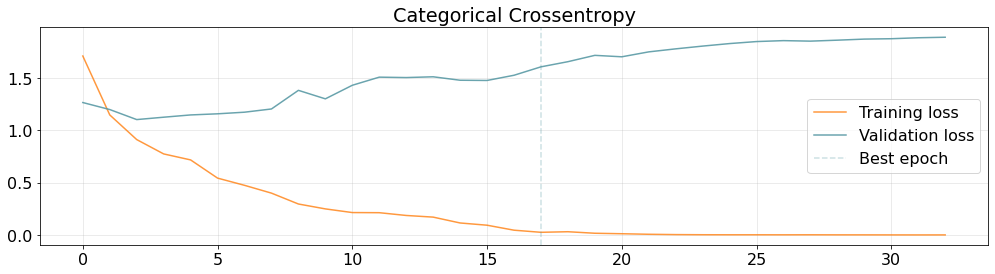

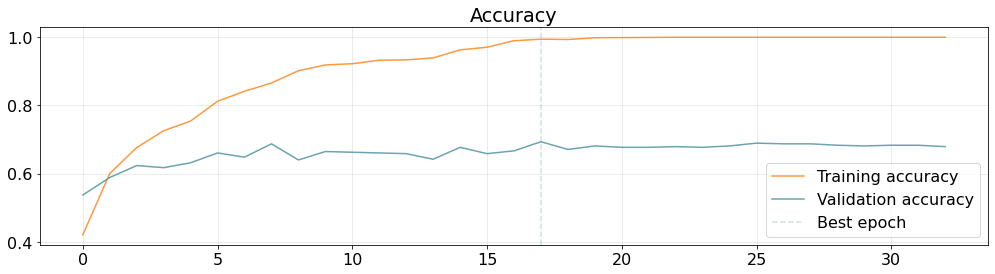

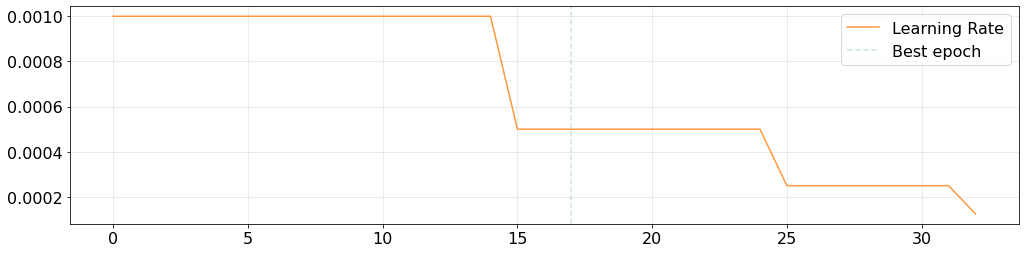

In [ ]:
# Plot results

best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# Predict the test set 

predictions = model.predict(x_test)
predictions.shape

(486, 12)

Accuracy: 0.6934
Precision: 0.6702
Recall: 0.5738
F1: 0.5827


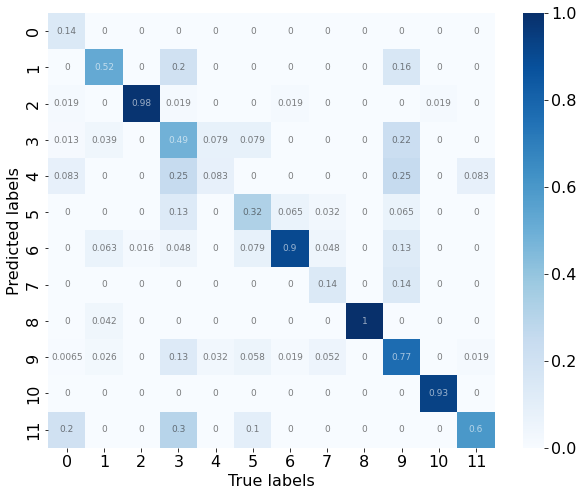

In [ ]:
# Compute the confusion matrix

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

cm = cm /cm.astype(float).sum(axis=1);

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', annot=True, annot_kws={'fontsize':9,'alpha':0.6})
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
# Save the model

model.save('SubmissionModel')
shutil.make_archive("SubmissionModel", 'zip', "./SubmissionModel")